In [1]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
data = pd.read_csv('~/features_phase6a.csv')

In [3]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [4]:
data.describe


<bound method NDFrame.describe of             FG1       FG2       FG3       FG4       FG5       FG6       FG7  \
0     -1.238300  0.994870 -0.736770  1.077300  0.254100  0.081738  0.171860   
1     -1.440600  0.582490 -1.290300  0.644140 -0.383130 -0.413500 -1.231400   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      2.023800 -0.519730 -1.129200  0.263080  0.184820 -0.051798 -0.000020   
4      0.905120  0.130080  1.091700  0.525140 -0.217620 -0.222880 -0.699780   
5      0.222850 -0.289960 -0.243210  0.381260  0.464190 -0.249300  0.749930   
6      0.905120  0.130080  1.091700  0.525140 -0.217620 -0.222880 -0.699780   
7     -1.138800  0.341280 -0.128460  0.340940 -0.620260  0.297470 -1.734400   
8      0.905120  0.130080  1.091700  0.525140 -0.217620 -0.222880 -0.699780   
9      1.722200 -1.464900 -0.896150 -0.315720  0.625850 -1.073300 -0.326540   
10     0.905120  0.130080  1.091700  0.525140 -0.217620 -0.222880 -0.699780   
11     1.404100 -1

In [5]:
## X -> features, y -> label
X= data.loc[:,'FG1':'SEP']
y = data.loc[:,'LABEL']

In [6]:
X.head()
y.head()

0                 Others
1               abstract
2                authors
3            affiliation
4    correspondingauthor
Name: LABEL, dtype: object

In [7]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

In [8]:
#train, testx = train_test_split(data, test_size=0.2)

In [9]:
#test.head()


In [10]:
#train.head()

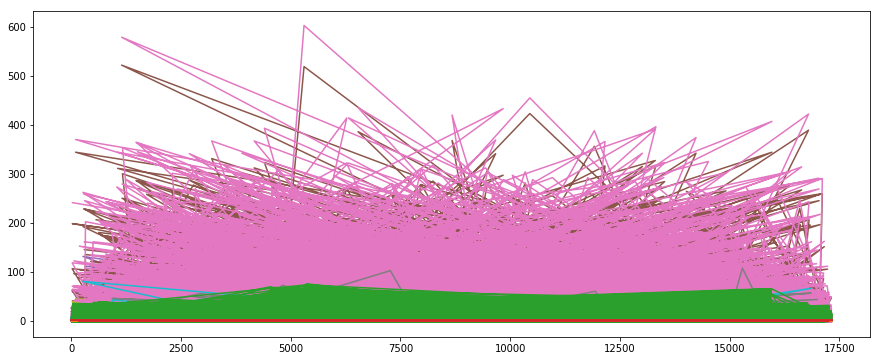

In [11]:
plt.plot(X_train)

In [12]:
#ax = newTrainData.plot()
#traindata.plot(ax=ax)

In [13]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)



0.772779700115


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
#print(classification_report(y_test, pred))


[[271  11  27   3   0  13   0   4   7  21   1   0   0   4   1   0]
 [ 31 473   5   0   0   5   0  11   0   6   0   0   0  11   1   0]
 [  2   1 117   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   6   0   2   0   1   0   0   3   4   1   0   0   0   0   0]
 [  2   0   0   0   2   0   0   0   2   0   0   0   0   0   0   0]
 [ 23   6   0   3   0 630   0   6  20  40   1   0   1   9   1   0]
 [  8   5   1   1   0   2   0   1   0   4   0   0   0   0   0   0]
 [  3  11   0   0   0  12   0 188   0   1   0   0   0   7   0   0]
 [ 15   7   0   1   0  32   0   9 243  44   0   0   0   5   0   0]
 [ 20   7   0   1   0  63   1   0  27 484   2   0   0   8   1   0]
 [ 23   8   1   1   0  11   0   8   3   7  10   0   0   9   0   0]
 [  4   6   0   1   0   0   0   2   0   0   0   0   0   2   2   0]
 [  1   1   0   0   0   9   0   0   2   2   1   0   1   2   0   0]
 [ 16  20   0   1   0   8   0  11   3   5   6   0   0 248   1   0]
 [  1   0   0   0   0   2   0   1   1   3   0   0   0   2  11 

In [ ]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)